In [1]:
import pandas as pd
import numpy as np
data=pd.read_csv("C:/Users/Bao Yu/Desktop/project/data/dataset.csv")
data=data.iloc[:,1:]
data.head()

,unixtime,itbit_price,btce_price,stamp_price,datetime,t,log_btce,log_itbit,log_stamp
0,1396572190,441.50,439.5230,457.37723,4/3/2014,0,6.085690,6.090178,6.125508
1,1396578190,441.50,438.9990,447.54221,4/3/2014,1,6.084497,6.090178,6.103771
2,1396584190,438.87,433.9890,442.07505,4/4/2014,2,6.073019,6.084203,6.091480
3,1396590190,435.28,425.0000,442.08631,4/4/2014,3,6.052089,6.075990,6.091505
4,1396596190,444.56,441.1105,452.57262,4/4/2014,4,6.089295,6.097085,6.114948


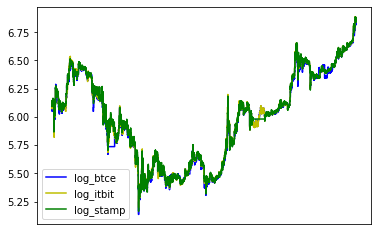

In [53]:
import matplotlib.pyplot as plt
import time
import matplotlib.dates as mdates

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.plot(data['datetime'],data['log_btce'],c='b')
plt.plot(data['datetime'],data['log_itbit'],c='y')
plt.plot(data['datetime'],data['log_stamp'],c='g')
plt.legend(['log_btce','log_itbit','log_stamp'],loc='best')
plt.show()

In [4]:
from statsmodels.tsa.stattools import adfuller
#log_return is stationary
print(adfuller(np.diff(data['log_btce'])))
print(adfuller(np.diff(data['log_itbit'])))
print(adfuller(np.diff(data['log_stamp'])))

(-18.482144461187684, 2.1325081738934284e-30, 41, 14401, {'1%': -3.4308041674881267, '5%': -2.8617407217693516, '10%': -2.566876839459475}, -96965.31604047758)
(-28.48771509871662, 0.0, 16, 14426, {'1%': -3.430803380283876, '5%': -2.8617403738867497, '10%': -2.5668766542851706}, -96109.71046563394)
(-23.729620253117332, 0.0, 33, 14409, {'1%': -3.430803915285511, '5%': -2.8617406103155654, '10%': -2.5668767801337777}, -84229.1759877054)


In [7]:
from statsmodels.tsa.stattools import coint
# 测试协整关系的存在(log_price)
print(coint(data.log_stamp, data.iloc[:,5:8],trend='ct'))

(-8.72349609342606, 1.9964549568242366e-11, array([-4.97095598, -4.4297201 , -4.14710897]))


In [8]:
import statsmodels.api as sm
#获得协整系数
X = sm.add_constant(data.iloc[:,5:8])
coef = sm.OLS(data.log_stamp, X).fit().params
coef

const       -9.456928e-03
t           -8.362100e-07
log_btce     2.482297e-02
log_itbit    9.782126e-01
dtype: float64

In [16]:
from numpy import *;
a=coef[0]
b=coef[1]
beta=mat([coef[2],coef[3],-1])

In [35]:
z=a+(b*mat(data.iloc[:,5])).T+data.iloc[:,6:9].dot(beta.T)


In [46]:
data['z']=z
data.head()

,unixtime,itbit_price,btce_price,stamp_price,datetime,t,log_btce,log_itbit,log_stamp,z
0,1396572190,441.50,439.5230,457.37723,4/3/2014,0,6.085690,6.090178,6.125508,-0.026411
1,1396578190,441.50,438.9990,447.54221,4/3/2014,1,6.084497,6.090178,6.103771,-0.004704
2,1396584190,438.87,433.9890,442.07505,4/4/2014,2,6.073019,6.084203,6.091480,0.001457
3,1396590190,435.28,425.0000,442.08631,4/4/2014,3,6.052089,6.075990,6.091505,-0.007124
4,1396596190,444.56,441.1105,452.57262,4/4/2014,4,6.089295,6.097085,6.114948,-0.009009


In [57]:
data['datetime'] = pd.to_datetime(data.datetime)

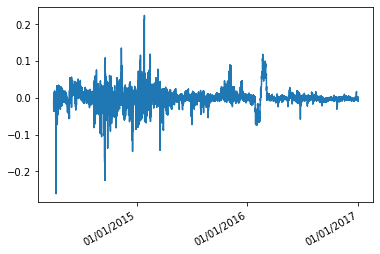

In [59]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
# Plot
plt.plot(data['datetime'], data['z'])
plt.gcf().autofmt_xdate()  # 自动旋转日期标记
plt.show()


In [60]:
# z is stationary
adfuller(data['z'])

(-8.723199131322334,
 3.342182954968699e-14,
 41,
 14402,
 {'1%': -3.4308041359474744,
  '5%': -2.8617407078308563,
  '10%': -2.566876832040158},
 -87033.26538229328)

In [62]:
z.mean()
import scipy.stats
t, pval = scipy.stats.ttest_1samp(data['z'], popmean=0.0)
print(t, pval)

-8.319691410668448e-11 0.9999999999336195


In [64]:
covariance_mat=np.cov(data.iloc[:,6:9])